In [1]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy
from os import listdir
from os.path import isfile, join
import array_tools

directory = '/Users/hwb/Desktop/numerical monopoles/python_results'


def load_slice(file):
    fo = open(file, 'rb')
    bytes = numpy.fromfile(fo, dtype=numpy.uint8)
    shaped_list = array_tools.reconstruct_2d(bytes)
    return shaped_list

def get_z_value(file):
    parts = str.split(file, '_')
    return float(parts[len(parts) - 2])
    
def get_point_tuples(k, e_min, e_max):
    points=[]
    
    x0 = 0.025
    xn = 3.025
    y0 = 0.025
    yn = 3.025
    n = 60
    dx = (xn - x0) / n
    dy = (yn - y0) / n
    
    k_directory = directory + '/k=' + k + '/'
    files = [f for f in listdir(k_directory) if isfile(join(k_directory, f))]
    for f in files:
        
        shaped_list = load_slice(k_directory + f)
        
        z = get_z_value(f)

        for j, xl in enumerate(shaped_list):
            for i, e in enumerate(xl):
                if (e > e_min and  e < e_max):
                    points.append((x0 + i*dx, y0 + j*dy, z))
    return points


def get_max_value(k):
    k_directory = directory + '/k=' + k +'/'
    
    files = [f for f in listdir(k_directory) if isfile(join(k_directory, f))]
    
    max = 0
    for f in files:
        shaped_list = load_slice(k_directory + f)
        z = get_z_value(f)
        for i, xl in enumerate(shaped_list):
            for j, e in enumerate(xl):
                if (e > max and e != 255):
                    max = e      
    return max


def get_exceptional_tuples(k):
    exceptional = []
    
    x0 = 0.025
    xn = 3.025
    y0 = 0.025
    yn = 3.025
    n = 60
    dx = (xn - x0) / n
    dy = (yn - y0) / n
    
    k_directory = directory + '/k=' + k +'/'
    files = [f for f in listdir(k_directory) if isfile(join(k_directory, f))]
    for f in files:
        
        shaped_list = load_slice(k_directory + f)
        
        z = get_z_value(f)
    
        for i, xl in enumerate(shaped_list):
            for j, e in enumerate(xl):
                if (e == 255):
                    exceptional.append((x0 + i*dx, y0 + j*dy, z))
    return exceptional

    
def add_symmetric_points(original_points):
    points = []
    for t in original_points:
        points.append((t[0], t[1], t[2]))
        points.append((-t[0], t[1], t[2]))
        points.append((-t[0], -t[1], t[2]))
        points.append((t[0], -t[1], t[2]))
        points.append((t[0], t[1], -t[2]))
        points.append((-t[0], t[1], -t[2]))
        points.append((-t[0], -t[1], -t[2]))
        points.append((t[0], -t[1], -t[2]))
    return points


def plot_energy_density(k, lower_range, upper_range):
    points = add_symmetric_points(get_point_tuples(k, lower_range, upper_range))
    # points = add_symmetric_points(get_exceptional_tuples())

    x = map(lambda t: t[0], points)
    y = map(lambda t: t[1], points)
    z = map(lambda t: t[2], points)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
    ax.set_xlim3d(-2.0,2.0)
    ax.set_ylim3d(-2.0,2.0)
    ax.set_zlim3d(-2.0,2.0)

    ax.view_init(elev=18., azim=10)

    ax.scatter(x, y, z, s=1)
    
    
def plot_exceptional(k):
    points = add_symmetric_points(get_exceptional_tuples(k))

    x = map(lambda t: t[0], points)
    y = map(lambda t: t[1], points)
    z = map(lambda t: t[2], points)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
    ax.set_xlim3d(-0.5,0.5)
    ax.set_ylim3d(-0.8,0.8)
    ax.set_zlim3d(-2.0,2.0)

    ax.view_init(elev=0., azim=90)

    ax.scatter(x, y, z, s=1)
    

# ax.plot_trisurf(x, y, z)


# fig.savefig( '/Users/hwb/Desktop/numerical monopoles/tomaple/k=' + k + '.pdf')


In [ ]:
for i in range(1,99):
    plot_energy_density('0.' + "%02d" % i, 130, 134)

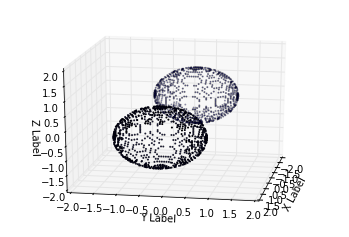

In [4]:
plot_energy_density('0.999' , 130, 134)

In [ ]:
for i in range(1,99):
    plot_energy_density('0.' + "%02d" % i, 150, 154)

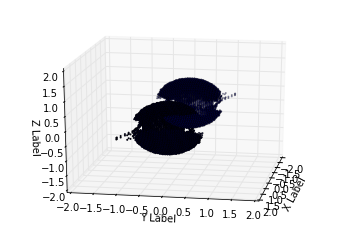

In [5]:
plot_energy_density('0.95' , 50, 65)


In [ ]:
plot_exceptional('0.75')

In [ ]:
plot_exceptional('0.20')
plot_exceptional('0.40')
plot_exceptional('0.60')
plot_exceptional('0.80')
plot_exceptional('0.95')

In [ ]:
plot_energy_density('0.25',150,154)

In [ ]:
plot_energy_density('0.50', 245, 255)
plot_exceptional('0.50')

In [ ]:
plot_exceptional('0.01')

In [ ]:
for i in range(1,99):
    plot_energy_density('0.' + "%02d" % i, 50, 54)

In [ ]:
for i in range(1,99):
    plot_energy_density('0.' + "%02d" % i, 10, 14)

In [ ]:
plot_energy_density('0.92', 215, 218)
plot_exceptional('0.92')

In [ ]:
plot_energy_density('0.50' , 150, 154)

In [ ]:
k="0.80"
print '/k=' + str(k) + '/' 